In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [3]:
from model_experiments.vae_experiment import VaeExperiment
from general.experiment import GenerativeModelType, TransformerType, OptimizerType
from general.utils import OutputActivation
from evaluators.machine_learning_evaluator import MachineLearningEvaluator, EvaluatorModelType, MetricType, ScalerType
from models.utils import Activation

import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')

In [4]:
config = {
    "dataset": "uci_credit_card.csv",
    "model_type": GenerativeModelType.VAE,
    "name": "vae_experiment",
    "data_path": "./data/",
    "data_processing": {
        "categorical_columns": [
            "SEX",
            "EDUCATION",
            "MARRIAGE",
            "PAY_0",
            "PAY_1",
            "PAY_2",
            "PAY_3",
            "PAY_4",
            "PAY_5",
            "PAY_6",
            "DEFAULT",
        ],
    },
    "model_config": {
        "compress_dims": [128, 128],
        "decompress_dims": [128, 128],
        "compress_activations": [Activation.LeakyReLU, Activation.LeakyReLU],
        "decompress_activations": [Activation.LeakyReLU, Activation.LeakyReLU],
        "latent_dim": 128,
        "batch_norm": True,
        "output_activations": {
            "continuous": OutputActivation.TANH,
            "categorical": OutputActivation.SOFTMAX,
        },
    },
    "model_train": {
        "seed": 1,
        "test_pct": 0.3,
        "k_fold": False,
        "stratified_by_col": None,
        "epochs": 50,
        "batch_size": 64,
        "dp_optimizer_type": OptimizerType.DPAdamGaussianOptimizer,
        "record_gradients": {"enabled": True, "subset": ["DEFAULT", "SEX"],},
        "transformer": {
            "type": TransformerType.BGM,
            "kwargs": {"outlier_clipping": True, "n_clusters": 6, "cont_feature_range": (-1, 1)},
        },
        "early_stop": {"enabled": False},
        "early_stop_epsilon": {"enabled": True, "value": 2.5},
    },
    "diff_priv": {
        "enabled": True,
        "microbatches": 1,
        "l2_norm_clip": 5.0,
        "noise_multiplier": 0.8,
    },
}

In [6]:
vae_experiment = VaeExperiment(config)
vae_experiment.run()

Config run already exists. Overwrite? y = yes, n = no
y
Training single model
Model number: 0
Max Epsilon of 2.5 reached at Epoch: 14, Step: 75
Start of epoch 0
Instructions for updating:
Use tf.identity instead.
step 0: mean loss = 49.32
step 100: mean loss = 49.33
step 200: mean loss = 48.45
step 300: mean loss = 47.86
epsilon = 1.72
Start of epoch 1
step 0: mean loss = 48.07
step 100: mean loss = 47.11
step 200: mean loss = 46.44
step 300: mean loss = 45.52
epsilon = 1.81
Start of epoch 2
step 0: mean loss = 45.23
step 100: mean loss = 45.25
step 200: mean loss = 44.92
step 300: mean loss = 44.06
epsilon = 1.89
Start of epoch 3
step 0: mean loss = 43.88
step 100: mean loss = 43.64
step 200: mean loss = 43.09
step 300: mean loss = 42.01
epsilon = 1.96
Start of epoch 4
step 0: mean loss = 41.96
step 100: mean loss = 41.47
step 200: mean loss = 41.54
step 300: mean loss = 40.67
epsilon = 2.02
Start of epoch 5
step 0: mean loss = 40.72
step 100: mean loss = 39.82
step 200: mean loss = 4

epsilon = 2.50
experiment saved to 7bcfcc3fe7c9709b063b240f7c68f0b18bdb555a.pkl


In [7]:
eval_input = {
    'target_col': 'DEFAULT',
    'data_path': './data/',
    'config_file': '7bcfcc3fe7c9709b063b240f7c68f0b18bdb555a.pkl'
}

evaluator = MachineLearningEvaluator(**eval_input)

In [8]:
df = pd.read_csv('./data/uci_credit_card.csv')

In [9]:
df = df.drop('Unnamed: 0', axis =1)

In [10]:
fake_df = evaluator.fake_df(model_run=0)

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
fake_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,215006,2,1,2,37,1,-1,-1,-2,-2,...,23696,4585,2240,3829,1870,2879,17,202,2481,0
1,-2690,1,1,2,57,0,0,0,0,0,...,32335,7144,21378,-305,3409,1606,418,3584,1740,0
2,41235,2,1,2,49,0,0,0,0,2,...,19861,40106,52151,1623,793,777,848,1200,7948,0
3,43372,1,1,2,27,0,0,5,0,0,...,32624,52893,51901,94,2536,2456,1679,1704,-154,0
4,3560,1,2,1,39,0,0,0,0,0,...,101345,21078,1248,-608,1323,3827,636,1040,-557,0


In [13]:
fake_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,67574.274714,1.509286,1.449095,1.752857,39.910857,0.031429,-0.198857,0.206905,-0.161000,0.274143,...,25705.316952,26778.746571,21200.178000,1796.362762,5065.545429,7783.004286,6924.374762,3753.703857,6532.558857,0.026905
std,100846.385463,0.499926,0.683689,0.434002,14.650993,1.016631,1.015185,1.876490,1.149368,1.721457,...,36486.716921,35765.952882,25276.614892,10409.831876,17420.488715,25897.651485,27875.307972,12532.342356,23694.920913,0.161809
min,-31377.000000,1.000000,1.000000,0.000000,19.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-15795.000000,-101711.000000,-28274.000000,-71472.000000,-1101.000000,-6790.000000,-38913.000000,-26302.000000,-21190.000000,0.000000
25%,6502.500000,1.000000,1.000000,2.000000,28.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,5236.500000,7977.000000,7588.750000,-290.000000,980.000000,982.250000,-48.000000,425.500000,201.750000,0.000000
50%,28633.000000,2.000000,1.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16983.500000,17992.500000,18684.500000,337.000000,2246.000000,2407.000000,430.000000,1420.000000,1169.500000,0.000000
75%,76196.500000,2.000000,2.000000,2.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30233.750000,30210.000000,28702.250000,1541.250000,3882.000000,5290.750000,1843.500000,2927.000000,3379.000000,0.000000
max,673456.000000,2.000000,4.000000,3.000000,82.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,669383.000000,579525.000000,533917.000000,349476.000000,330102.000000,647100.000000,377712.000000,294748.000000,356952.000000,1.000000


In [14]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


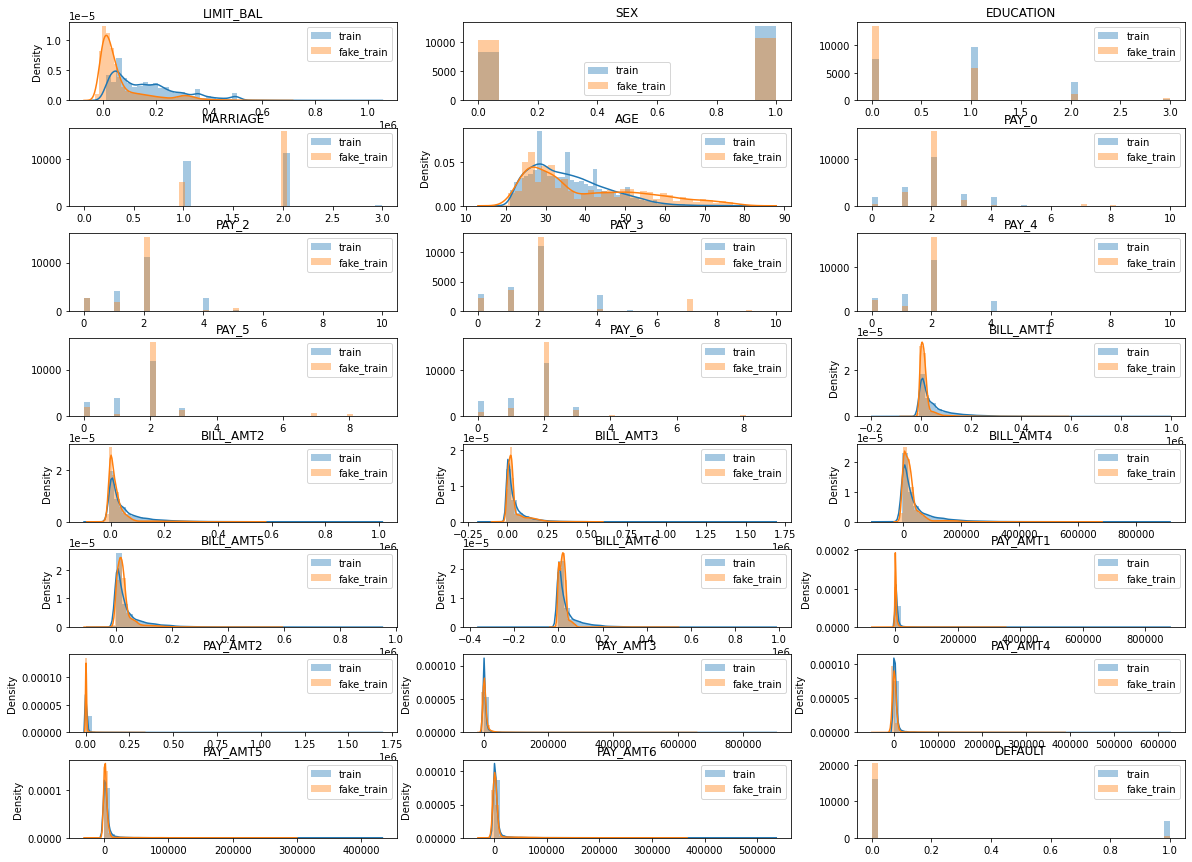

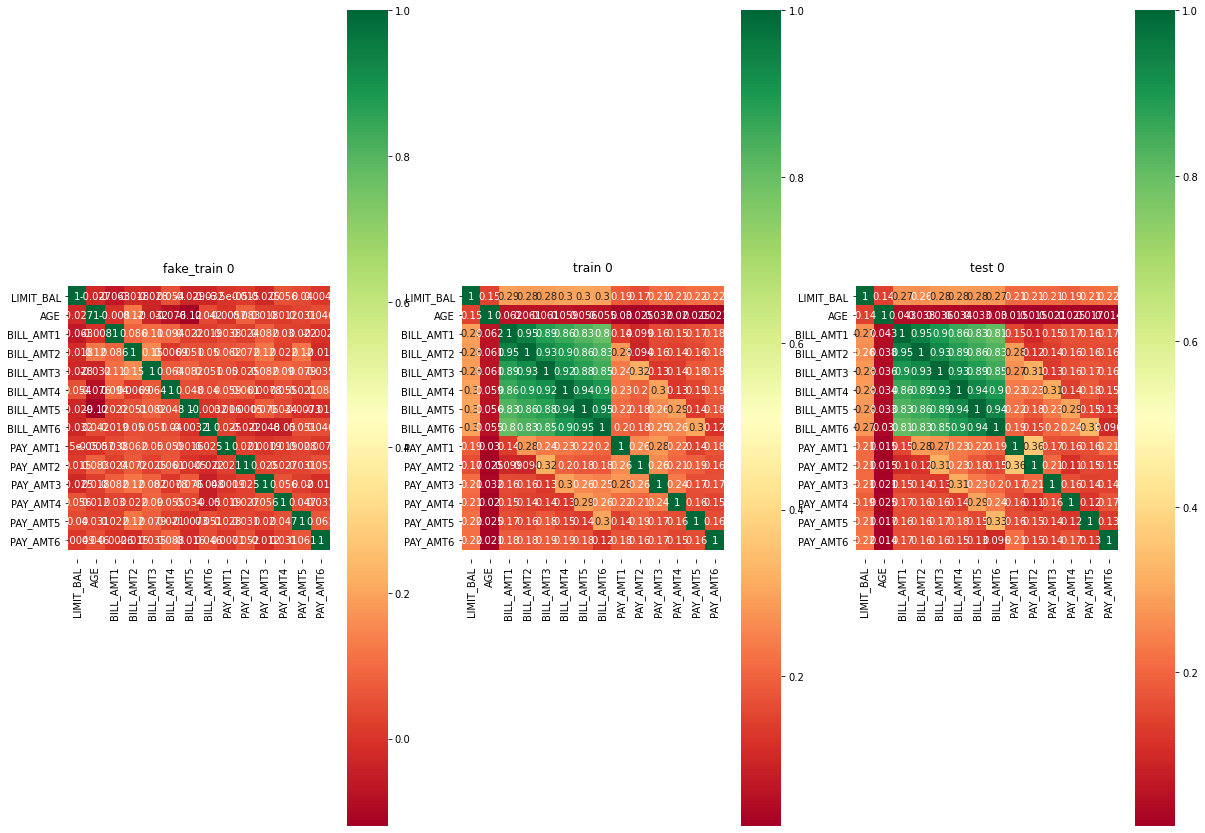

In [15]:
evaluator.plot_distributions()
evaluator.plot_heatmap()

In [16]:
model_kwargs = {'n_estimators': 50, 'max_depth': 5}
  
scores = evaluator.data_utility_scores(
   EvaluatorModelType.GradientBoostingClassifier, 
   [MetricType.ACCURACY],
   ScalerType.MINMAX,
   model_kwargs=model_kwargs)
print(scores)

   fake_test_accuracy  real_test_accuracy
0            0.784889            0.831222
